# About Dataset
### Data Source:
This is a competition data from Kaggle about house prices for data science students ..

#### Data Contains two files -> (train dataset - test dataset)
train-dataset has 'SalePrice' labels

test-dataset want to get his labels

### Goal: 
Predict sales prices and practice feature engineering, RFs, and gradient boosting

### Practice Skills
Creative feature engineering 

Advanced regression techniques like random forest and gradient boosting

### Our Goal:
1- Data Understanding

2- Data Cleaning

3- Exploratory Data Analysis to get insights

4- Feature Engineering

5- Build Several ML models and choose the best (Linear models - decision tree - random forest - XGBoost - Clusters)

# DATA UNDERSTANDING

#### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

#### import train-dataset that have labels 'SalePrice'

In [2]:
path1 = 'D:\\WORK Space\\My Portfolio\\House Prices\\0-Data\\raw data\\train.csv'
train_df = pd.read_csv(path1, index_col=0)
train_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

#### import test-dataset without labels to predict these labels

In [3]:
path2 = 'D:\\WORK Space\\My Portfolio\\House Prices\\0-Data\\raw data\\test.csv'
test_df = pd.read_csv(path2, index_col=0)
test_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg   
1462          20       RL         81.0    14267   Pave   NaN      IR1   
1463          60       RL         74.0    13830   Pave   NaN      IR1   
1464          60       RL         78.0     9978   Pave   NaN      IR1   
1465         120       RL         43.0     5005   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
Id                                    ...                                      
1461         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1462         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
1463         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
1464         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1465         HLS    AllPub    Inside  ...         144        0    NaN    NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                                 
1461         NaN       0       6    2010        WD         Normal  
1462        Gar2   12500       6    2010        WD         Normal  
1463         NaN       0       3    2010        WD         Normal  
1464         NaN       0       6    2010        WD         Normal  
1465         NaN       0       1    2010        WD         Normal  

[5 rows x 79 columns]

#### Combining datasets

In [4]:
full_df = pd.concat([train_df, test_df])
full_df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2915         160       RM         21.0     1936   Pave   NaN      Reg   
2916         160       RM         21.0     1894   Pave   NaN      Reg   
2917          20       RL        160.0    20000   Pave   NaN      Reg   
2918          85       RL         62.0    10441   Pave   NaN      Reg   
2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
5            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
2915         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2916         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2917         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2918         Lvl    AllPub    Inside  ...        0    NaN  MnPrv        Shed   
2919         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1          0      2    2008        WD         Normal   208500.0  
2          0      5    2007        WD         Normal   181500.0  
3          0      9    2008        WD         Normal   223500.0  
4          0      2    2006        WD        Abnorml   140000.0  
5          0     12    2008        WD         Normal   250000.0  
...      ...    ...     ...       ...            ...        ...  
2915       0      6    2006        WD         Normal        NaN  
2916       0      4    2006        WD        Abnorml        NaN  
2917       0      9    2006        WD        Abnorml        NaN  
2918     700      7    2006        WD         Normal        NaN  
2919       0     11    2006        WD         Normal        NaN  

[2919 rows x 80 columns]

### TRAIN-DATASET EXPLORING

In [5]:
print(f"Data Contains {train_df.shape[0]} Houses, {train_df.shape[1]} Features.")

Data Contains 1460 Houses, 80 Features.


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [7]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
cate_cols = []   # train_df.select_dtypes(include=['object']).columns
num_cols =  []   # train_df.select_dtypes(include=['int64','float64']).columns

for col in train_df.columns:
    if train_df[col].dtype in ['int64','float64']:
        num_cols.append(col)
    else:
        cate_cols.append(col)
        
print('Categorical Features:\n')
print(*cate_cols)
print()
print('Numerical Features:\n')
print(*num_cols)

Categorical Features:

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition

Numerical Features:

MSSubClass LotFrontage LotArea OverallQual OverallCond YearBuilt YearRemodAdd MasVnrArea BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF LowQualFinSF GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr TotRmsAbvGrd Fireplaces GarageYrBlt GarageCars GarageArea WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal MoSold YrSold SalePrice


In [9]:
print('Groups of Houses:\n')
for col in cate_cols:
    print(f'{col}({train_df[col].dropna().nunique()}): {train_df[col].dropna().unique()}')
    print()

Groups of Houses:

MSZoning(5): ['RL' 'RM' 'C (all)' 'FV' 'RH']

Street(2): ['Pave' 'Grvl']

Alley(2): ['Grvl' 'Pave']

LotShape(4): ['Reg' 'IR1' 'IR2' 'IR3']

LandContour(4): ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities(2): ['AllPub' 'NoSeWa']

LotConfig(5): ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope(3): ['Gtl' 'Mod' 'Sev']

Neighborhood(25): ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Condition1(9): ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Condition2(8): ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

BldgType(5): ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

HouseStyle(8): ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

RoofStyle(6): ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

RoofMatl(8): ['CompShg' 'WdShngl'

We ensure every feature has distinct categories not different spelling or any thing wrong...

Extract categorical feature its type is numbers

In [10]:
print('Categorical Features:\n')
for col in train_df.columns:
    if train_df[col].dtype in ['int64','float64'] and train_df[col].nunique() < 11:
        print(f'{col}({train_df[col].nunique()}) {train_df[col].unique()}')

Categorical Features:

OverallQual(10) [ 7  6  8  5  9  4 10  3  1  2]
OverallCond(9) [5 8 6 7 4 2 3 9 1]
BsmtFullBath(4) [1 0 2 3]
BsmtHalfBath(3) [0 1 2]
FullBath(4) [2 1 3 0]
HalfBath(3) [1 0 2]
BedroomAbvGr(8) [3 4 1 2 0 5 6 8]
KitchenAbvGr(4) [1 2 3 0]
Fireplaces(4) [0 1 2 3]
GarageCars(5) [2 3 1 0 4]
PoolArea(8) [  0 512 648 576 555 480 519 738]
YrSold(5) [2008 2007 2006 2009 2010]


Any Missing Values or duplicated values?

In [11]:
print("Counting of missing values:", sum(train_df.isna().sum()))

Counting of missing values: 7829


In [12]:
print("Counting of duplicated values:", train_df.duplicated().sum())

Counting of duplicated values: 0


Summary Statistics of sale price

In [13]:
s = train_df['SalePrice'].describe().apply(lambda x: format(x, '.1f'))
s

count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: object

In [14]:
print("Mode of SalePrice:", *dict(train_df['SalePrice'].value_counts()[:1]))

Mode of SalePrice: 140000


In [15]:
print(f"The differance between mean and median: { train_df['SalePrice'].mean()-train_df['SalePrice'].median() :.2f} ")

The differance between mean and median: 17921.20 


SalePrice is right-skewed distribution because (Mean > Median), 

we will handle it..

# DATA PREPARATION

Take Copy of train-data frames to make changes..

In [16]:
df = train_df.copy()

Counting null values in every column

In [17]:
nully = df.isna().sum().sort_values(ascending=False)

for k, val in nully.items():
    if val>0:
        print(k, val)

PoolQC 1453
MiscFeature 1406
Alley 1369
Fence 1179
MasVnrType 872
FireplaceQu 690
LotFrontage 259
GarageYrBlt 81
GarageCond 81
GarageType 81
GarageFinish 81
GarageQual 81
BsmtExposure 38
BsmtFinType2 38
BsmtCond 37
BsmtQual 37
BsmtFinType1 37
MasVnrArea 8
Electrical 1


Notice: some columns [PoolQC - MiscFeature - Alley - Fence ] have many many null values 

ex: PoolQC column contains 1453 of 1460 are null values

Are these features not important (insignificant)?

I think so these are not important so I'm going to remove them ..

Removing columns that contains more than 80% missing values.

In [18]:
df_precols = df.columns.to_list()
threshold = len(df)*0.80

for col in df.columns:
    if df[[col]].isna().sum()[0] > threshold:
        df = df.drop([col], axis=1)

df_remcols = list(set(df_precols) - set(df.columns.to_list()))
full_df = full_df.drop(df_remcols, axis=1)

print("Removing columns..")
print(df_remcols)

Removing columns..
['PoolQC', 'MiscFeature', 'Alley', 'Fence']


Let's rename some of names to ease understanding it

In [19]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                          
1           60       RL         65.0     8450   Pave      Reg         Lvl   
2           20       RL         80.0     9600   Pave      Reg         Lvl   
3           60       RL         68.0    11250   Pave      IR1         Lvl   
4           70       RL         60.0     9550   Pave      IR1         Lvl   
5           60       RL         84.0    14260   Pave      IR1         Lvl   

   Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                ...                                       
1     AllPub    Inside       Gtl  ...             0         0           0   
2     AllPub       FR2       Gtl  ...             0         0           0   
3     AllPub    Inside       Gtl  ...             0         0           0   
4     AllPub    Corner       Gtl  ...           272         0           0   
5     AllPub       FR2       Gtl  ...             0         0           0   

   PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
Id                                                                      
1         0       0       2    2008        WD         Normal    208500  
2         0       0       5    2007        WD         Normal    181500  
3         0       0       9    2008        WD         Normal    223500  
4         0       0       2    2006        WD        Abnorml    140000  
5         0       0      12    2008        WD         Normal    250000  

[5 rows x 76 columns]

In [20]:
df['MSZoning'] = df['MSZoning'].replace({'RL':'Low Density',
                                         'RM':'Medium Density',
                                         'RH':'High Density',
                                         'C (all)':'Commercial',
                                         'FV':'Floating Village'}) # ['RL' 'RM' 'C (all)' 'FV' 'RH']

df['LotShape'] = df['LotShape'].replace({'Reg':'Regular',
                                         'IR1':'Slightly irregular',
                                         'IR2':'Moderately Irregular',
                                         'IR3':'Irregular'})      # ['Reg' 'IR1' 'IR2' 'IR3']
df = df.replace({'Ex':'Excellent',
            'Gd':'Good',
            'TA':'Average/Typical',
            'Fa':'Fair',
            'Po':'Poor'})
df.head()

MSSubClass     MSZoning  LotFrontage  LotArea Street            LotShape  \
Id                                                                             
1           60  Low Density         65.0     8450   Pave             Regular   
2           20  Low Density         80.0     9600   Pave             Regular   
3           60  Low Density         68.0    11250   Pave  Slightly irregular   
4           70  Low Density         60.0     9550   Pave  Slightly irregular   
5           60  Low Density         84.0    14260   Pave  Slightly irregular   

   LandContour Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch  \
Id                                            ...                           
1          Lvl    AllPub    Inside       Gtl  ...             0         0   
2          Lvl    AllPub       FR2       Gtl  ...             0         0   
3          Lvl    AllPub    Inside       Gtl  ...             0         0   
4          Lvl    AllPub    Corner       Gtl  ...           272         0   
5          Lvl    AllPub       FR2       Gtl  ...             0         0   

   ScreenPorch PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
Id                                                                         
1            0        0       0       2    2008        WD         Normal   
2            0        0       0       5    2007        WD         Normal   
3            0        0       0       9    2008        WD         Normal   
4            0        0       0       2    2006        WD        Abnorml   
5            0        0       0      12    2008        WD         Normal   

   SalePrice  
Id            
1     208500  
2     181500  
3     223500  
4     140000  
5     250000  

[5 rows x 76 columns]

# Exploratory Data Analysis

In [21]:
cate_cols = list(df.select_dtypes(include=['object']).columns)+['OverallQual']
num_cols =  list(set(df.select_dtypes(include=['int64','float64']).columns)-{'OverallQual'})
print('Number of Categorical Columns:',len(cate_cols), '\nNumber of Numerical Columns:',len(num_cols))

Number of Categorical Columns: 40 
Number of Numerical Columns: 36


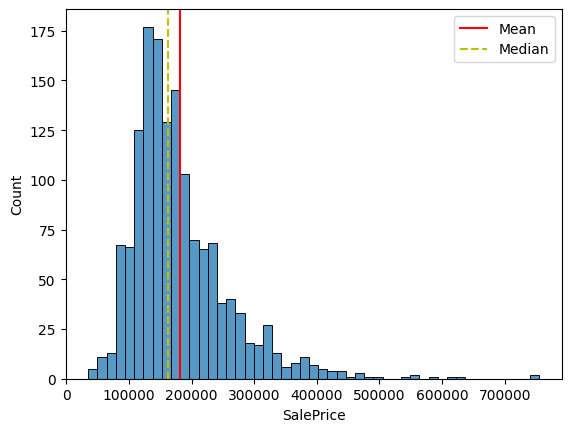

In [22]:
sns.histplot(df['SalePrice'])
plt.axvline(df['SalePrice'].mean(), c="r", ls="-", label="Mean")
plt.axvline(df['SalePrice'].median(), c="y", ls="--", label="Median")
plt.legend()
plt.show()

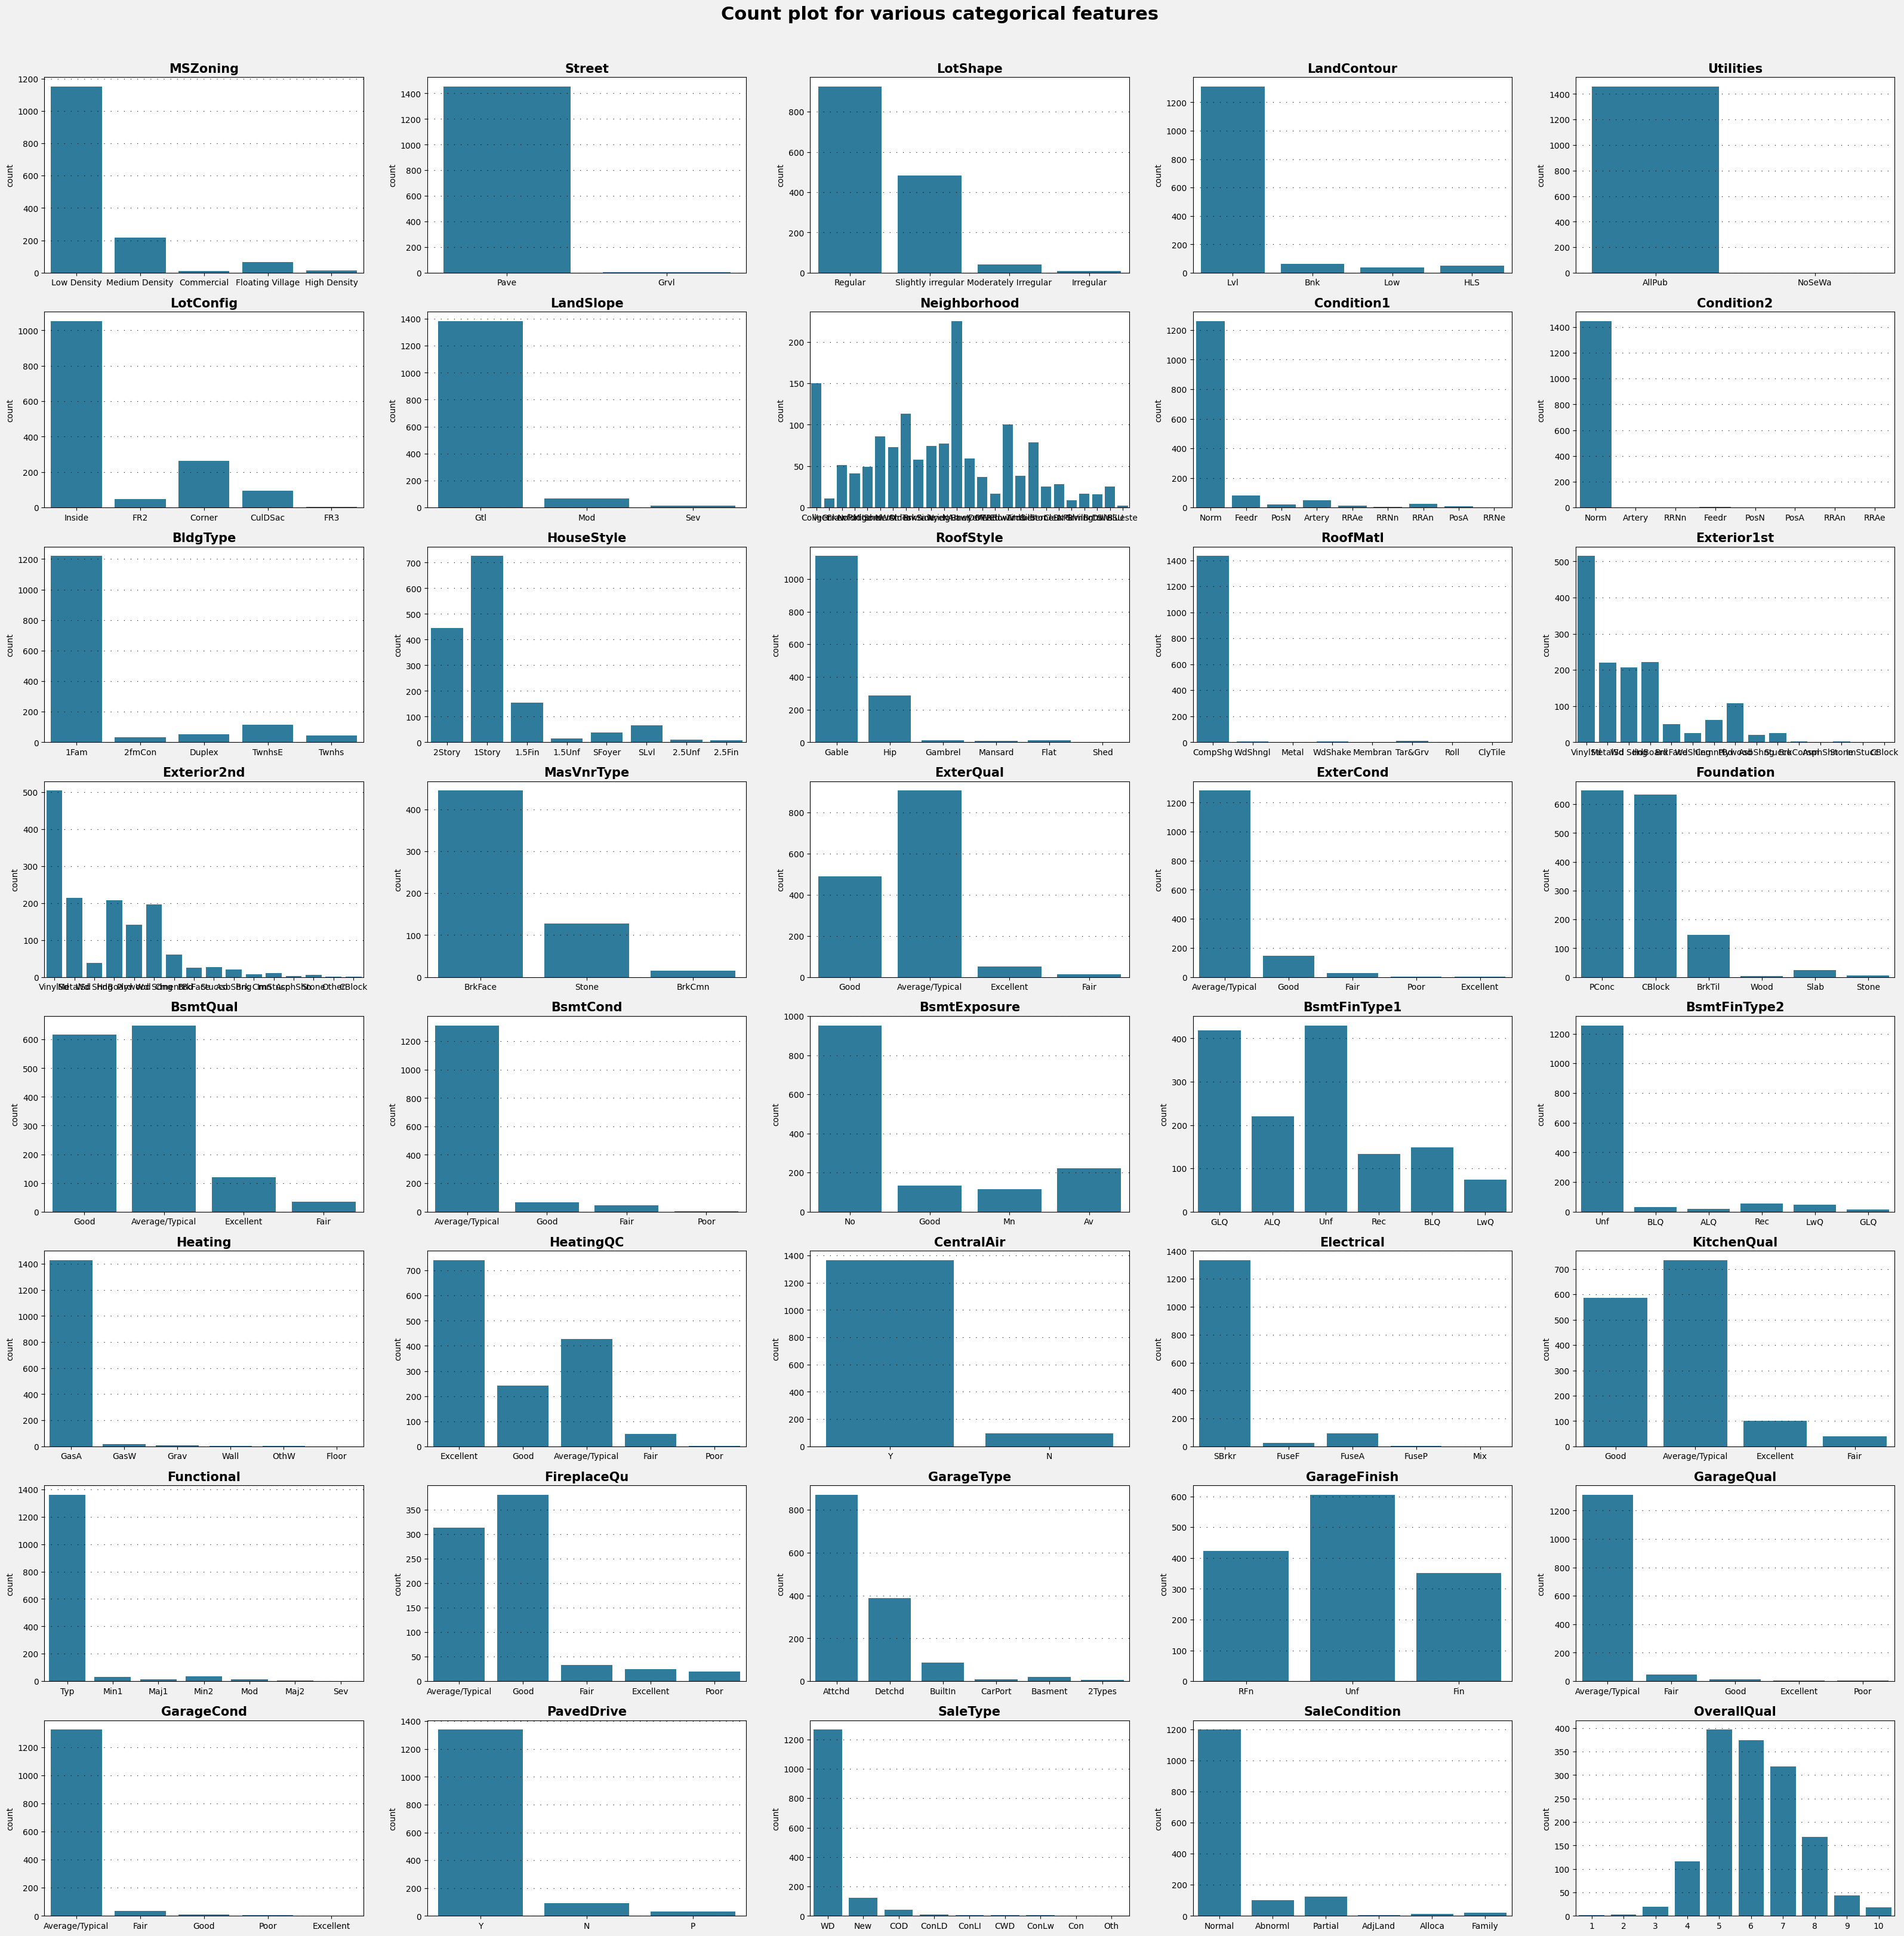

In [23]:
# dark gray-> #191919, pale gray-> #F1F1F1
def plot_cate_feat(df, ax, col_name):
    ax.set_title(col_name,fontweight ="bold",fontsize=15)
    ax.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
    sns.countplot(ax=ax,data=df,x=col_name, color='#1C82AD')
    ax.set_xlabel("")

fig = plt.figure(figsize=(40,40))
gs  = fig.add_gridspec(8,5)
axes = []

for i in range(8):
    for j in range(5):
        ax = fig.add_subplot(gs[i,j])
        axes.append(ax)


fig.suptitle(t='Count plot for various categorical features',y=0.91, fontweight ="bold",fontsize=22)
fig.set_facecolor("#F1F1F1")

for ax,col_name in zip(axes,cate_cols):
    plot_cate_feat(df, ax, col_name)


plt.show()

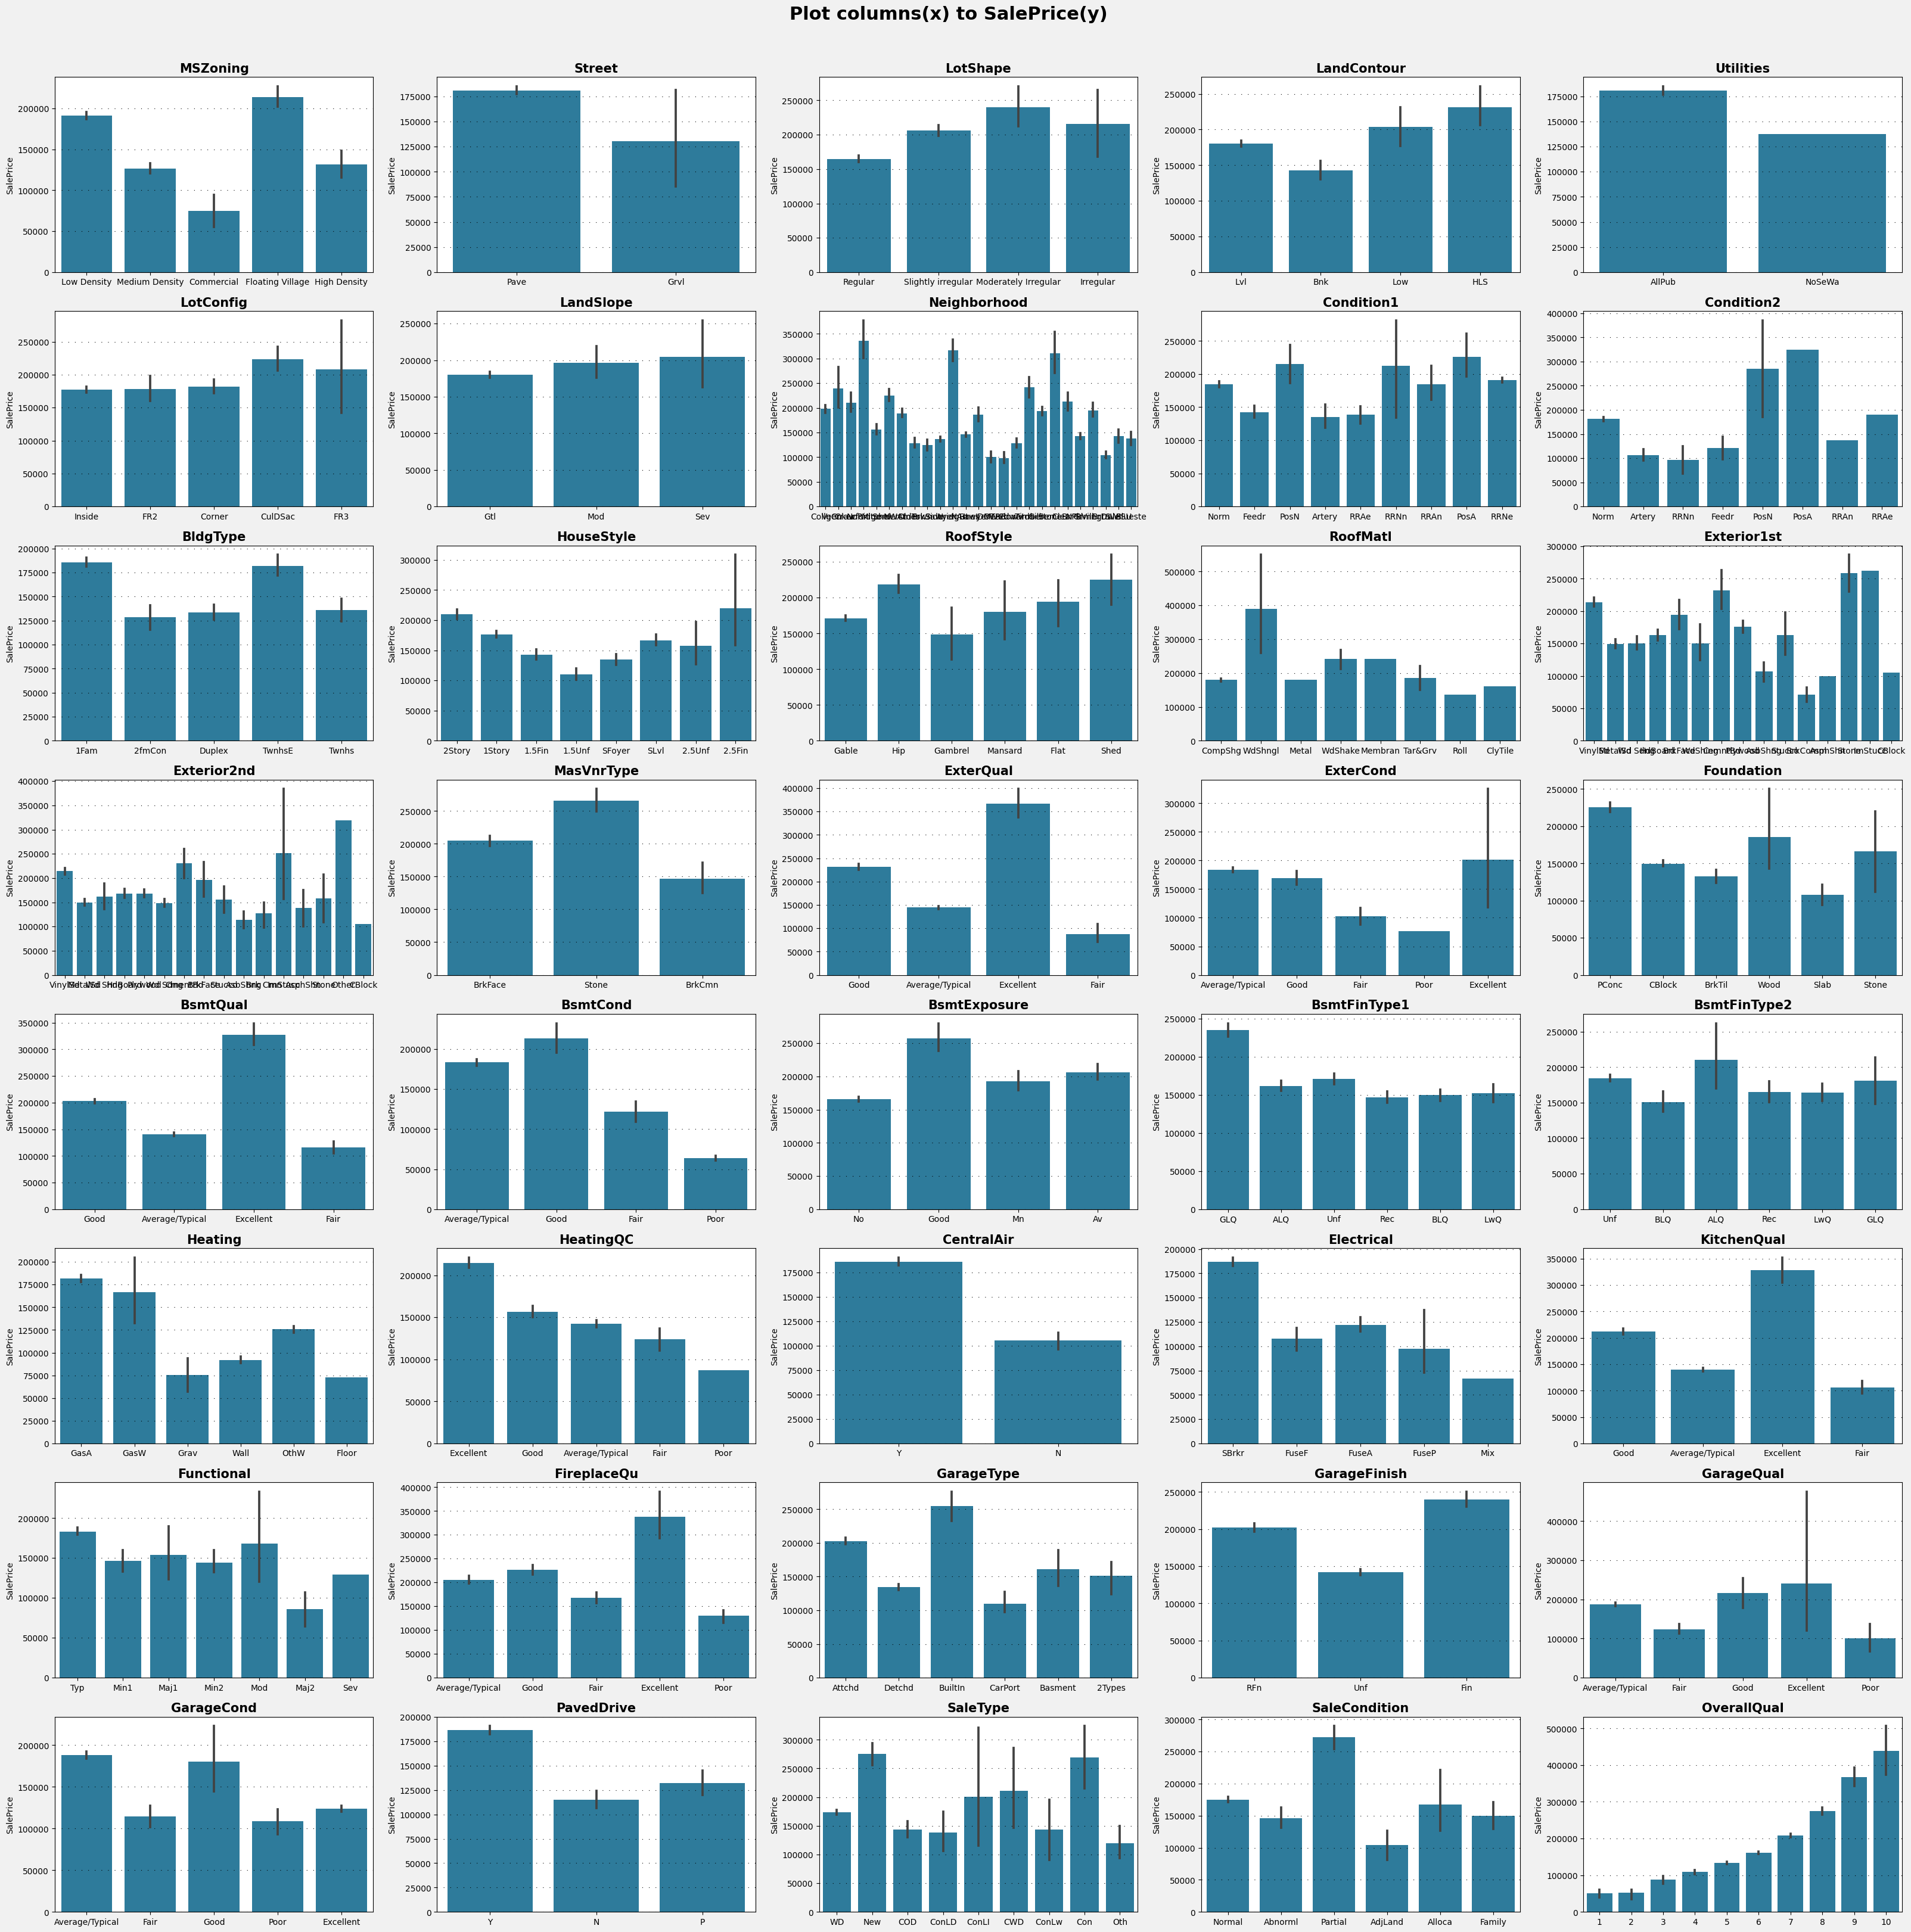

In [24]:
def plot_cate_feat_to_y(df, ax, col_name, target='SalePrice'):
    ax.set_title(col_name,fontweight ="bold",fontsize=15)
    ax.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
    sns.barplot(ax=ax,data=df,x=col_name, y=target, color='#1C82AD')
    ax.set_xlabel("")

fig = plt.figure(figsize=(40,40))
gs  = fig.add_gridspec(8,5)
axes = []

for i in range(8):
    for j in range(5):
        ax = fig.add_subplot(gs[i,j])
        axes.append(ax)


fig.suptitle(t='Plot columns(x) to SalePrice(y)',y=0.91, fontweight ="bold",fontsize=22)
fig.set_facecolor("#F1F1F1")

for ax,col_name in zip(axes,cate_cols):
    plot_cate_feat_to_y(df, ax, col_name)


plt.show()

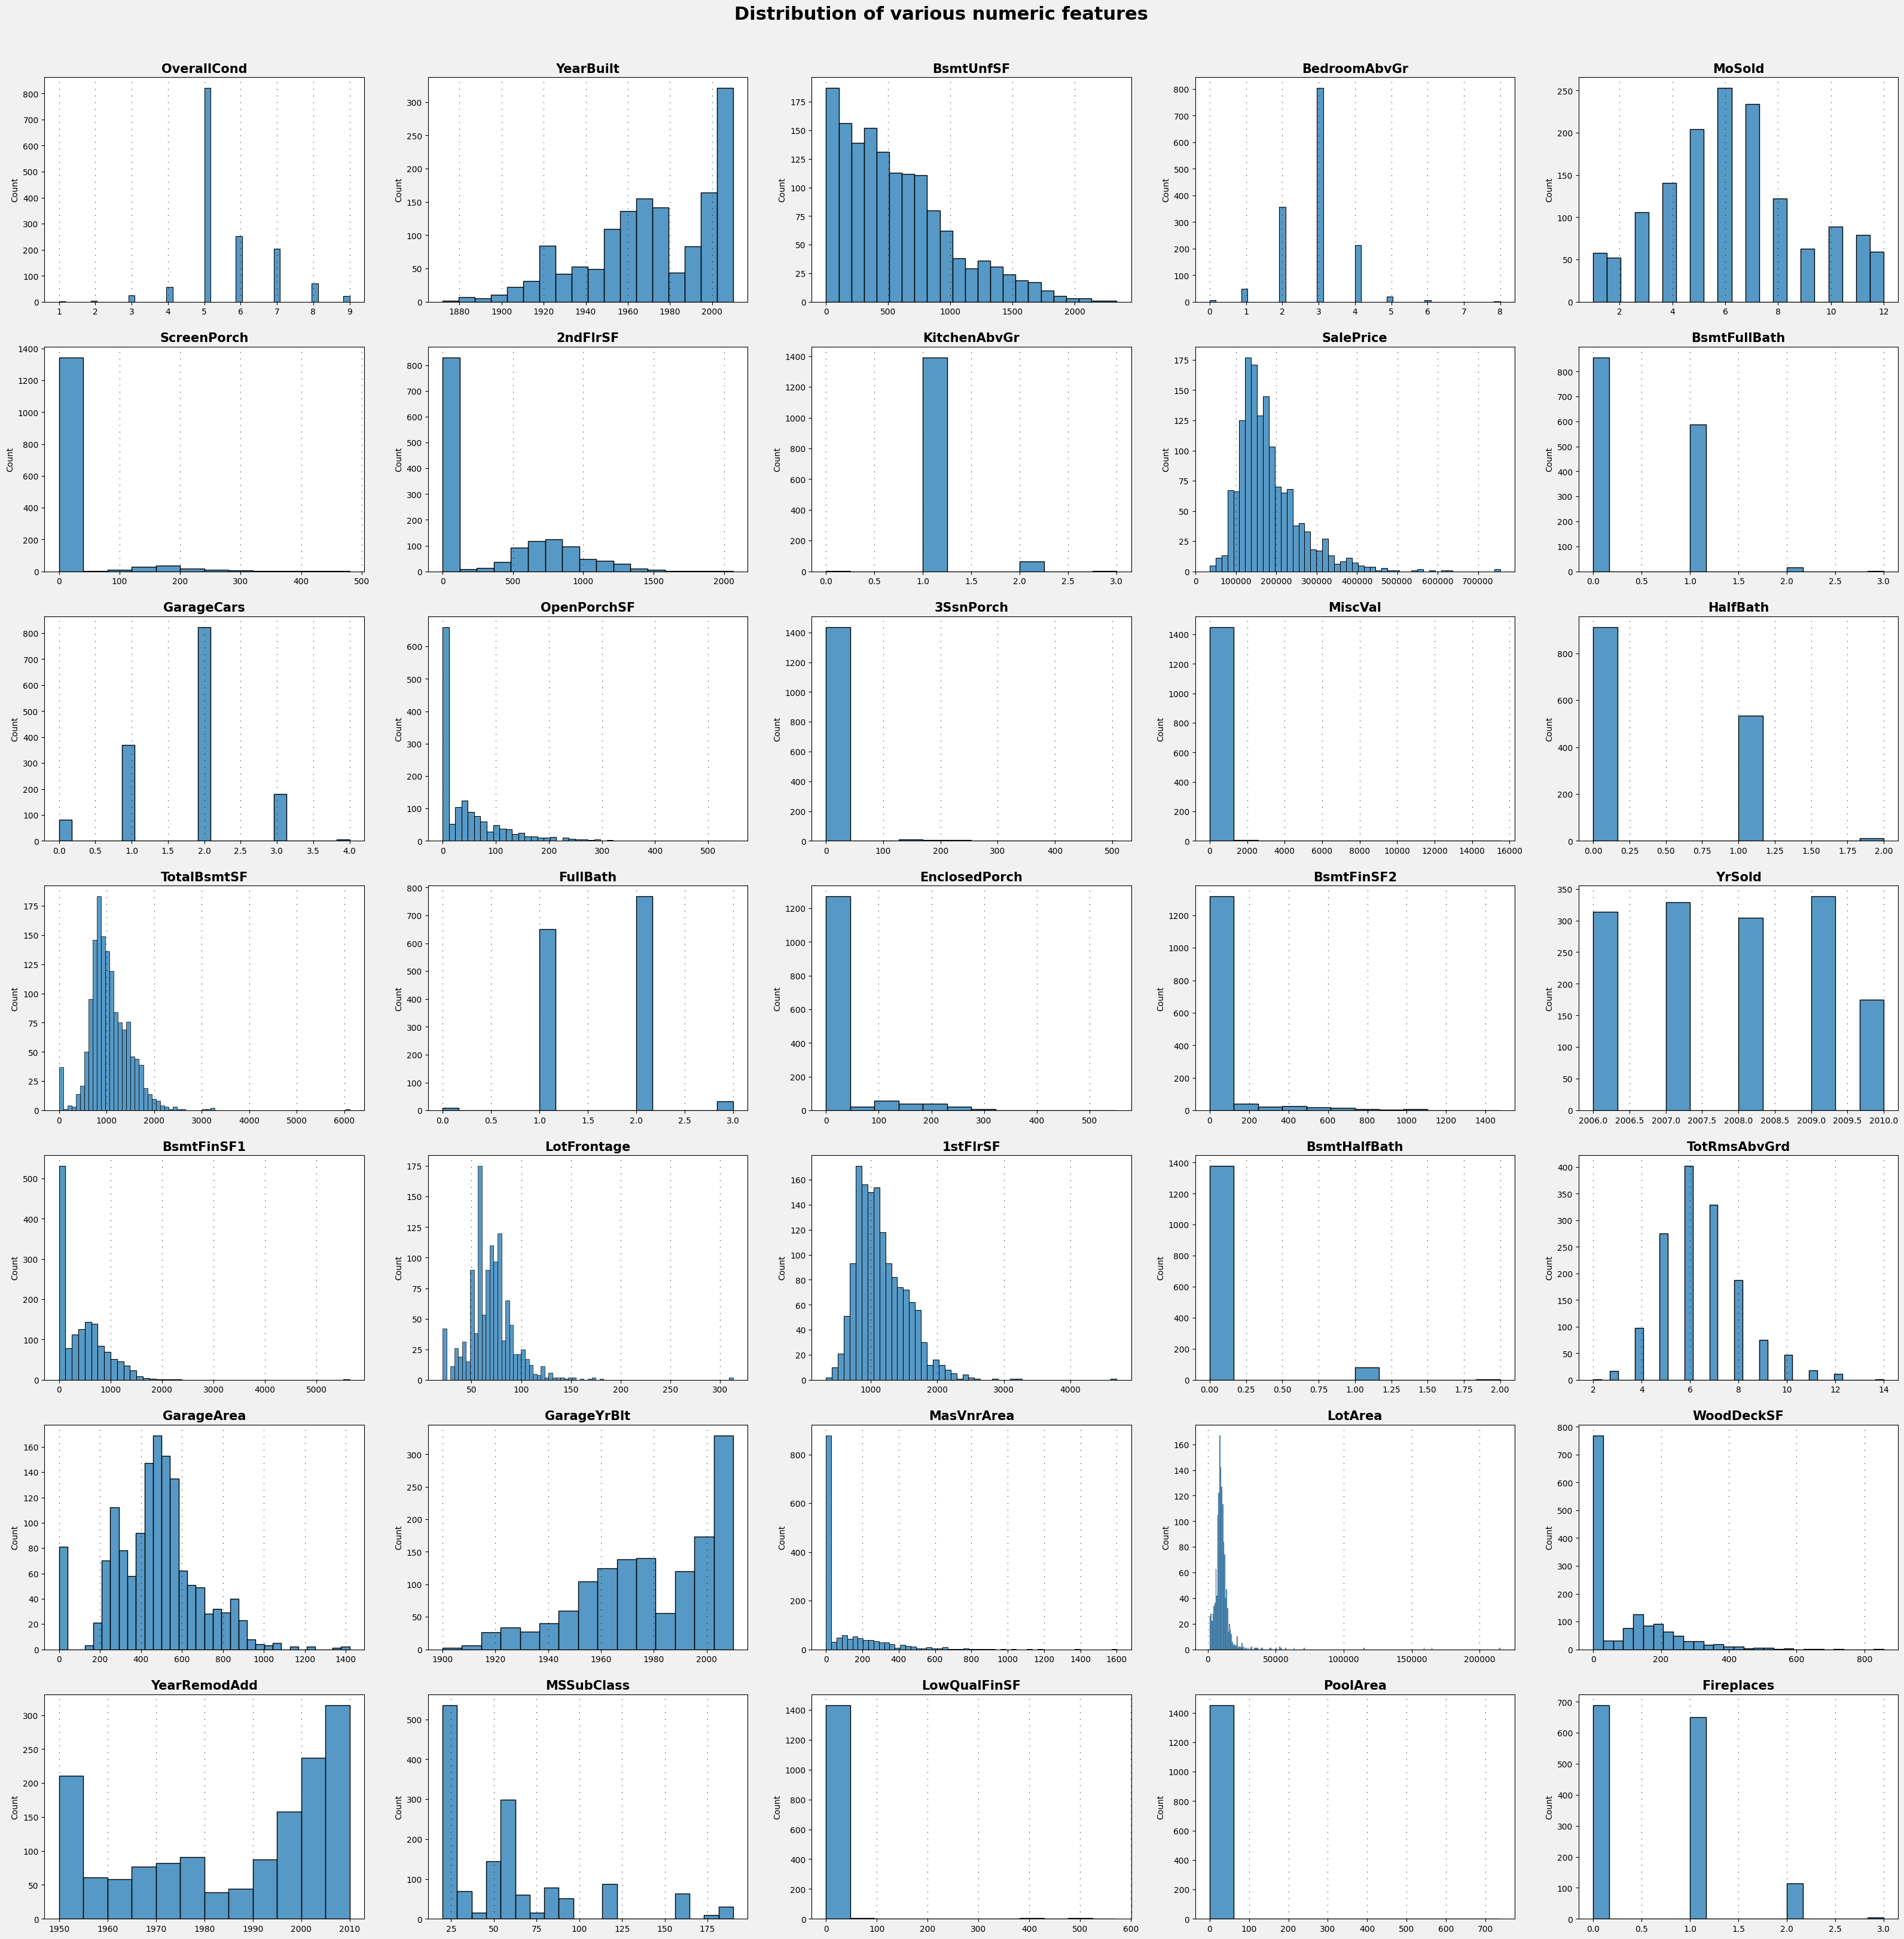

In [25]:
def plot_con_feat(df, ax, col_name):
    ax.set_title(col_name,fontweight ="bold",fontsize=15)
    ax.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
    sns.histplot(ax=ax,data=df,x=col_name, fill=True)
    ax.set_xlabel("")

fig = plt.figure(figsize=(40,40))
gs  = fig.add_gridspec(7,5)
axes = []

for i in range(7):
    for j in range(5):
        ax = fig.add_subplot(gs[i,j])
        axes.append(ax)



fig.suptitle(t='Distribution of various numeric features',y=0.91, fontweight ="bold",fontsize=22)
fig.set_facecolor("#F1F1F1")


for ax,col_name in zip(axes,num_cols):
    plot_con_feat(df, ax, col_name)

plt.show()

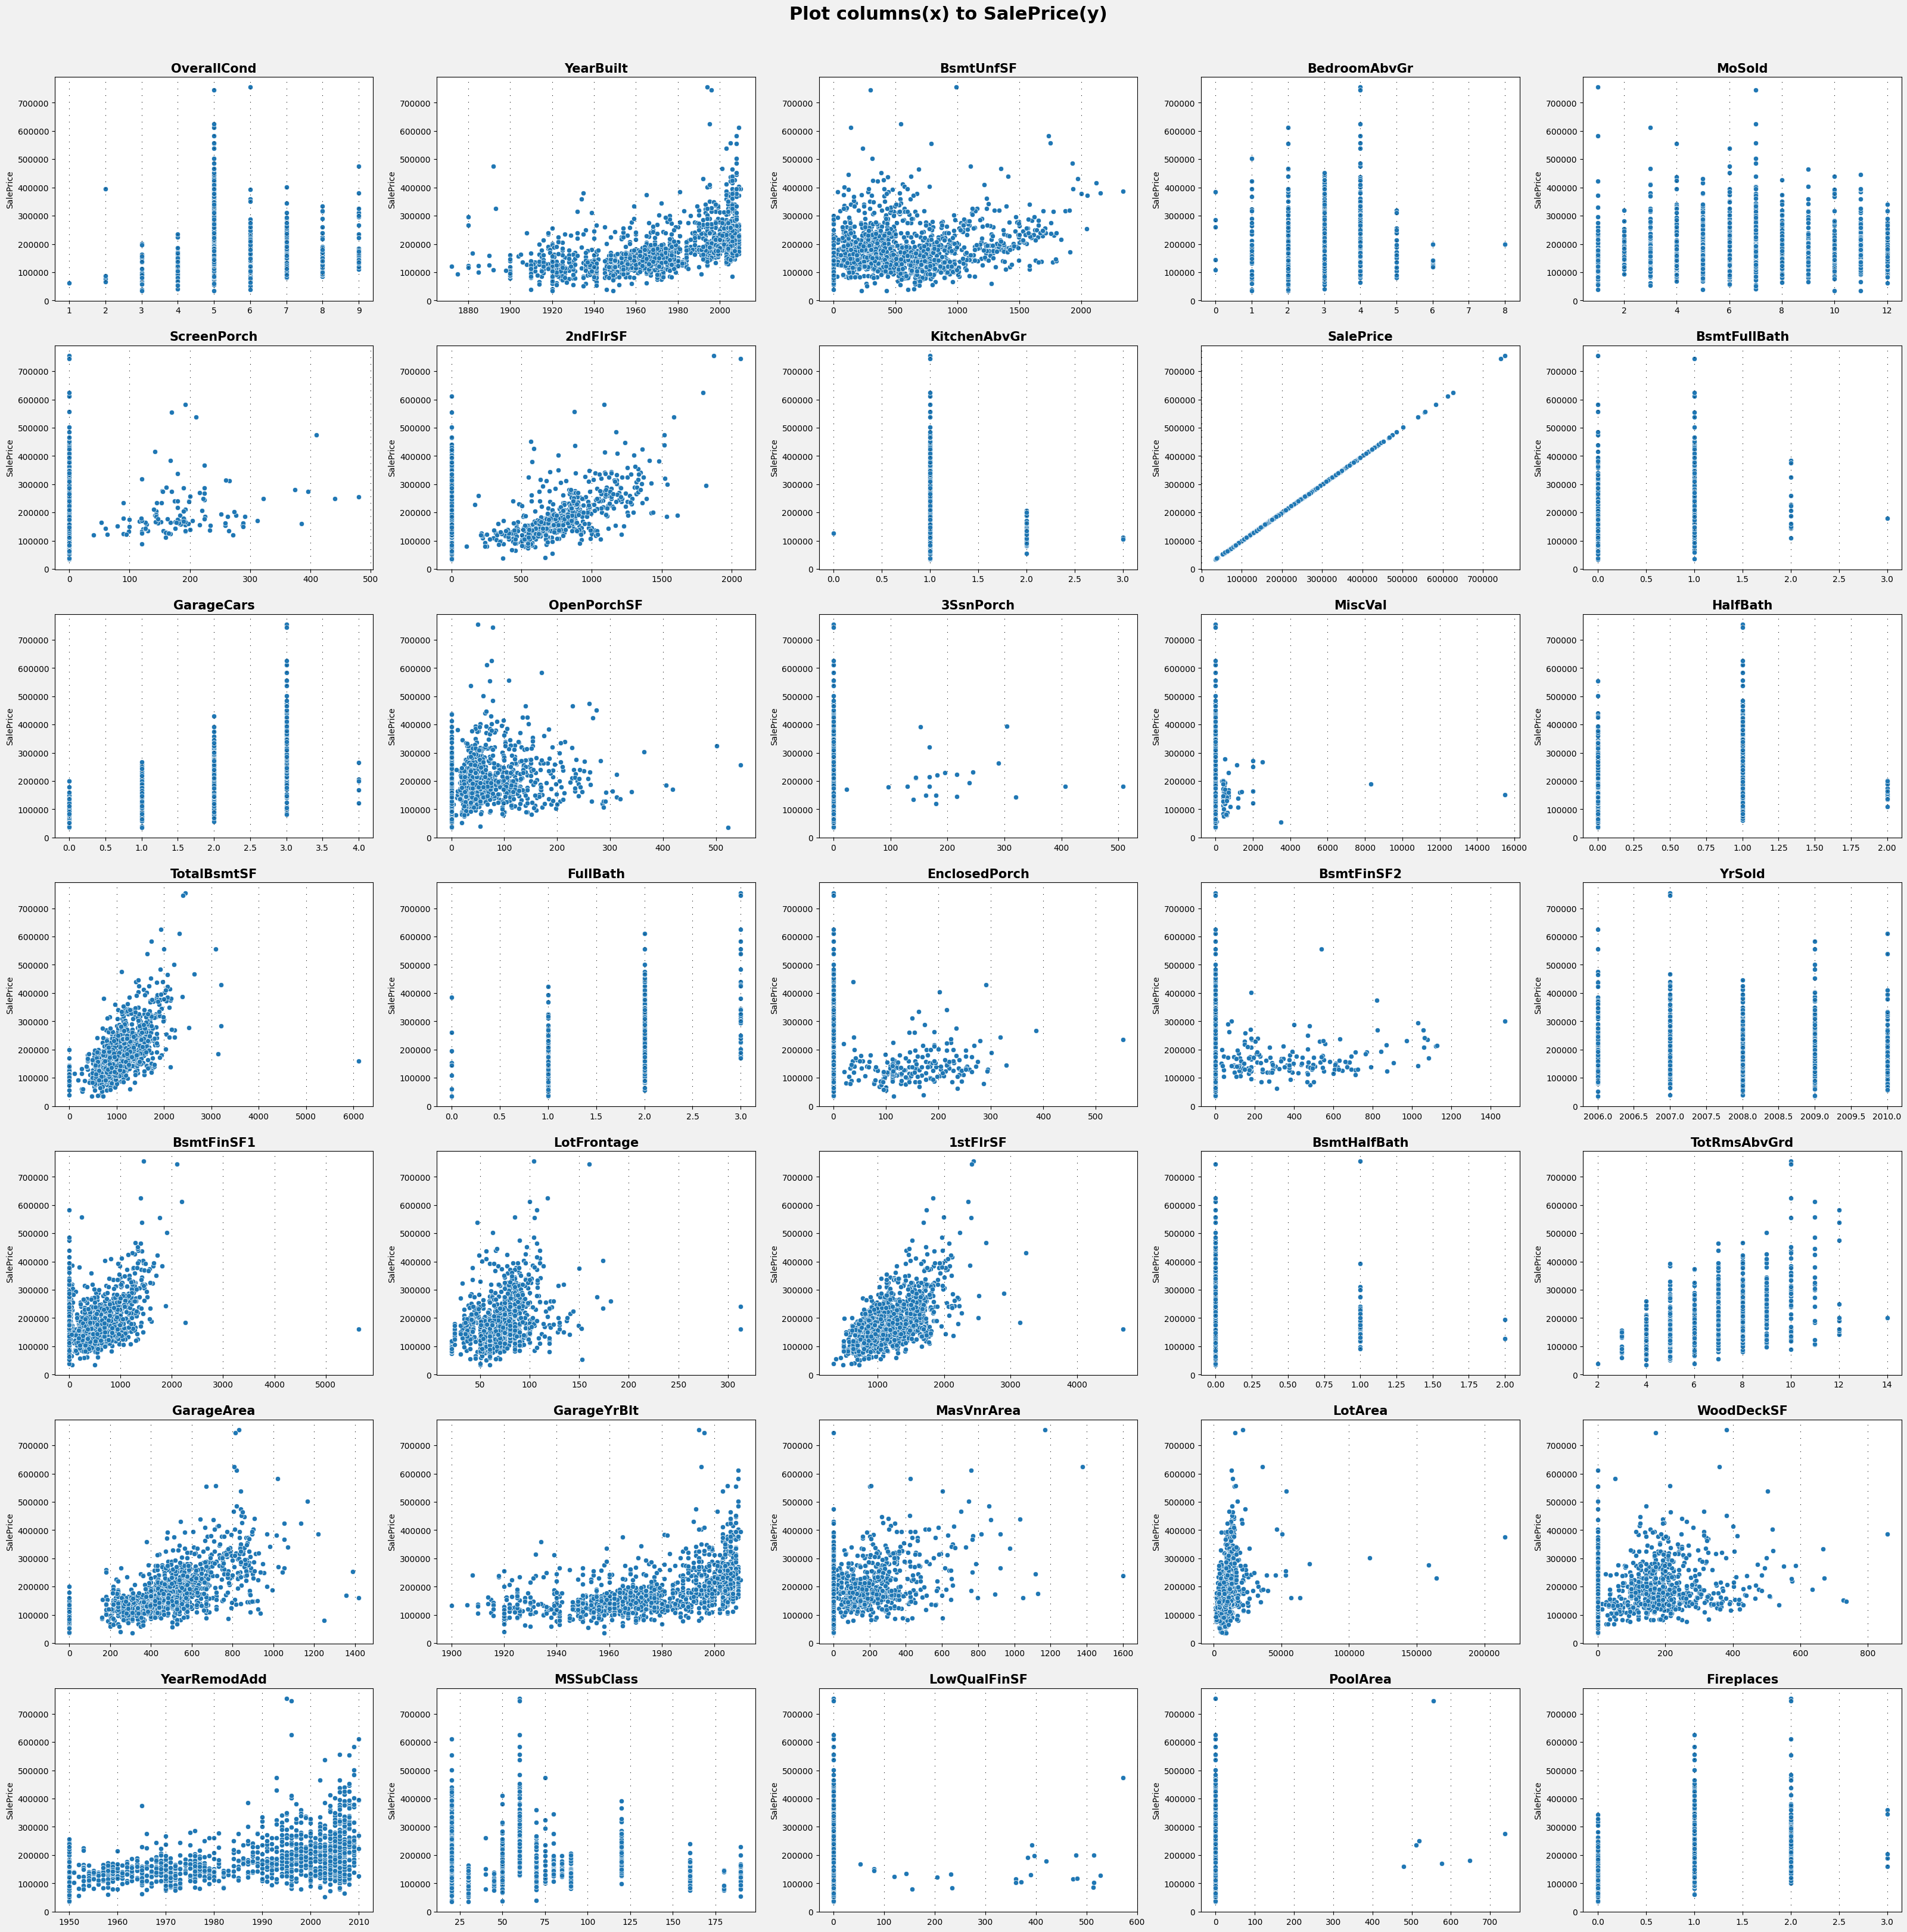

In [26]:
def plot_con_feat_to_y(df, ax, col_name, target='SalePrice'):
    ax.set_title(col_name,fontweight ="bold",fontsize=15)
    ax.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
    sns.scatterplot(ax=ax,data=df,x=col_name, y=target)
    ax.set_xlabel("")

fig = plt.figure(figsize=(40,40))
gs  = fig.add_gridspec(7,5)
axes = []

for i in range(7):
    for j in range(5):
        ax = fig.add_subplot(gs[i,j])
        axes.append(ax)



fig.suptitle(t='Plot columns(x) to SalePrice(y)',y=0.91, fontweight ="bold",fontsize=22)
fig.set_facecolor("#F1F1F1")


for ax,col_name in zip(axes,num_cols):
    plot_con_feat_to_y(df, ax, col_name)

plt.show()

# Feature Engineering

### Dealing with Null values

Dealing with null values by replacing them with the average or most common

In [27]:
nully = df.isna().sum().sort_values(ascending=False)
print("Null Values:")
for k, val in nully.items():
    if val>0:
        print(k, val)

Null Values:
MasVnrType 872
FireplaceQu 690
LotFrontage 259
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
BsmtExposure 38
BsmtFinType2 38
BsmtQual 37
BsmtCond 37
BsmtFinType1 37
MasVnrArea 8
Electrical 1


With data_description, 

[FireplaceQu] I found NA means No Fireplace

[GarageType - GarageYrBlt - GarageFinish - GarageQual - GarageCond] I found NA means No Garage

[BsmtExposure - BsmtQual - BsmtCond - BsmtFinType1 - BsmtFinType2]  I found NA means No Basement

So I replace NA to No (Fireplace\Garage\Basement), Because if I replace it by average that could has negative impact..

In [28]:
garage_feats = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'] # 'GarageYrBlt'
basement_feats = ['BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2']

full_df['FireplaceQu'] = full_df['FireplaceQu'].replace({np.nan:'No Fireplace'})
full_df['GarageYrBlt'] = full_df['GarageYrBlt'].replace({np.nan:0}) # that help linear model to ignore this NA by f(x)= 0.xi = 0
full_df[garage_feats] = full_df[garage_feats].replace({np.nan:'No Garage'})
full_df[basement_feats] = full_df[basement_feats].replace({np.nan:'No Basement'})

df = full_df.iloc[:1460,:]
test_df = full_df.iloc[1460:,:]

df.isna().sum()[df.isna().sum() != 0].sort_values(ascending=False)

MasVnrType     872
LotFrontage    259
MasVnrArea       8
Electrical       1
dtype: int64

These are real missing values that we have to deal with by replacing them with the average

### Feature Transformation

make_pipeline for Cleaning Data, StandardScaler and OrdinalEncoder

In [29]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder # Scaling Numirec & Encode Categoric
from sklearn.impute import SimpleImputer # Deal with NULLs
from sklearn.pipeline import make_pipeline

Now let's deal with null values with replacing of the average for the numerical features and the most common for categorical features & Transforming Data to fit model..

In [30]:
num_cols =  []
cate_cols = []
target_col = 'SalePrice'

for c in df.columns:
    if df[c].dtype == 'object':
        cate_cols.append(c)
    else:
        if df[c].nunique() > 11:
            if c != 'SalePrice': # filter column if SalePrice
                num_cols.append(c)
        else:
            cate_cols.append(c)

pipe_NUM = make_pipeline(SimpleImputer(strategy ='mean'), MinMaxScaler())
pipe_CAT = make_pipeline(SimpleImputer(strategy ='most_frequent'), OrdinalEncoder())

new_nums  = pipe_NUM.fit_transform(full_df[num_cols])
new_cats  = pipe_CAT.fit_transform(full_df[cate_cols])

full_df[num_cols] = new_nums
full_df[cate_cols] = new_cats

df = full_df.iloc[:1460,:]
test_df = full_df.iloc[1460:,:]

df

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
Id                                                                    
1       0.235294       3.0     0.150685  0.033420     1.0       3.0   
2       0.000000       3.0     0.202055  0.038795     1.0       3.0   
3       0.235294       3.0     0.160959  0.046507     1.0       0.0   
4       0.294118       3.0     0.133562  0.038561     1.0       0.0   
5       0.235294       3.0     0.215753  0.060576     1.0       0.0   
...          ...       ...          ...       ...     ...       ...   
1456    0.235294       3.0     0.140411  0.030929     1.0       3.0   
1457    0.000000       3.0     0.219178  0.055505     1.0       3.0   
1458    0.294118       3.0     0.154110  0.036187     1.0       3.0   
1459    0.000000       3.0     0.160959  0.039342     1.0       3.0   
1460    0.000000       3.0     0.184932  0.040370     1.0       3.0   

      LandContour  Utilities  LotConfig  LandSlope  ...  EnclosedPorch  \
Id                                                  ...                  
1             3.0        0.0        4.0        0.0  ...       0.000000   
2             3.0        0.0        2.0        0.0  ...       0.000000   
3             3.0        0.0        4.0        0.0  ...       0.000000   
4             3.0        0.0        0.0        0.0  ...       0.268775   
5             3.0        0.0        2.0        0.0  ...       0.000000   
...           ...        ...        ...        ...  ...            ...   
1456          3.0        0.0        4.0        0.0  ...       0.000000   
1457          3.0        0.0        4.0        0.0  ...       0.000000   
1458          3.0        0.0        4.0        0.0  ...       0.000000   
1459          3.0        0.0        4.0        0.0  ...       0.110672   
1460          3.0        0.0        4.0        0.0  ...       0.000000   

      3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  YrSold  SaleType  \
Id                                                                             
1           0.0          0.0       0.0  0.000000  0.090909     2.0       8.0   
2           0.0          0.0       0.0  0.000000  0.363636     1.0       8.0   
3           0.0          0.0       0.0  0.000000  0.727273     2.0       8.0   
4           0.0          0.0       0.0  0.000000  0.090909     0.0       8.0   
5           0.0          0.0       0.0  0.000000  1.000000     2.0       8.0   
...         ...          ...       ...       ...       ...     ...       ...   
1456        0.0          0.0       0.0  0.000000  0.636364     1.0       8.0   
1457        0.0          0.0       0.0  0.000000  0.090909     4.0       8.0   
1458        0.0          0.0       0.0  0.147059  0.363636     4.0       8.0   
1459        0.0          0.0       0.0  0.000000  0.272727     4.0       8.0   
1460        0.0          0.0       0.0  0.000000  0.454545     2.0       8.0   

      SaleCondition  SalePrice  
Id                              
1               4.0   208500.0  
2               4.0   181500.0  
3               4.0   223500.0  
4               0.0   140000.0  
5               4.0   250000.0  
...             ...        ...  
1456            4.0   175000.0  
1457            4.0   210000.0  
1458            4.0   266500.0  
1459            4.0   142125.0  
1460            4.0   147500.0  

[1460 rows x 76 columns]

Dealing with skewness of [Sale Price] by log(x) to new_x to be close to the normal distribution (to make data more Gaussian-like).

This helps to improve linear models' performance

In [31]:
df['log_SalePrice'] = np.log(df['SalePrice'])

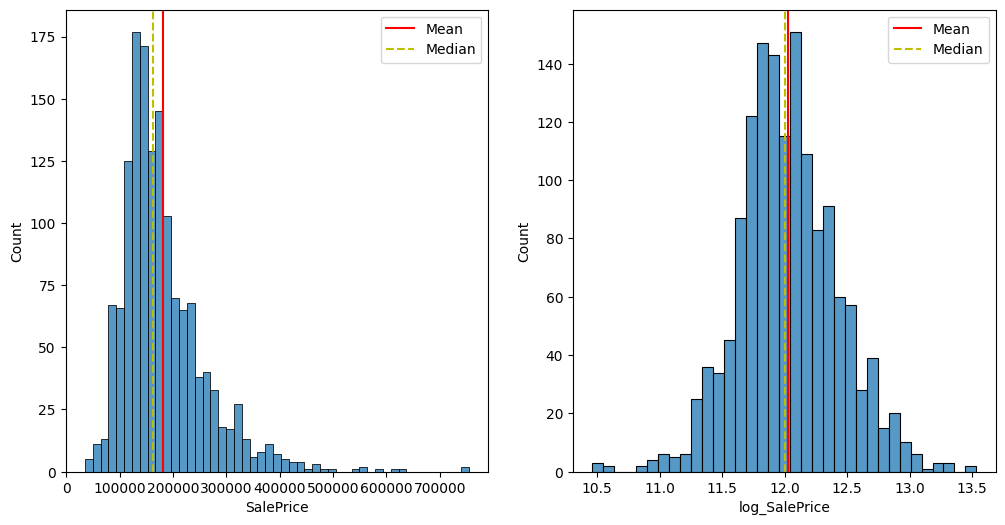

In [32]:
fig = plt.figure(figsize=(12,6))
gs  = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

sns.histplot(df['SalePrice'], ax=ax1)
ax1.axvline(df['SalePrice'].mean(), c="r", ls="-", label="Mean")
ax1.axvline(df['SalePrice'].median(), c="y", ls="--", label="Median")
ax1.legend()

sns.histplot(df['log_SalePrice'], ax=ax2)
ax2.axvline(df['log_SalePrice'].mean(), c="r", ls="-", label="Mean")
ax2.axvline(df['log_SalePrice'].median(), c="y", ls="--", label="Median")
ax2.legend()

plt.show()

This new column (log_SalePrice) will help us in Linear Models because this [Skewness] affects the performance of the model [outliers problem] ..

NOTE:// NOT USEFUL FOR TREE MODELS

### Let's Save new train-Dataset for Power-BI

In [33]:
# df.to_csv('D:\\WORK Space\\My Portfolio\\House Prices\\0-Data\\processed data\\train_BI.csv')

### Feature Selection

Now we want to see all_features (X) and target_feature (y), 

So we used dimensionality reduction to reduce the number of features (X) to one-dimension (x)

(by transforming the data into a lower-dimensional space while retaining important information. with PCA)

In [34]:
from sklearn.decomposition import PCA

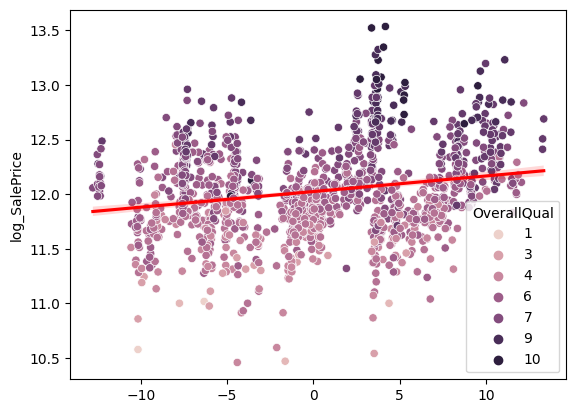

In [35]:
pca = PCA(n_components=1)
X_1d = pca.fit_transform(df.drop(['SalePrice', 'log_SalePrice'],axis=1)).reshape((1460, ))

sns.scatterplot(x=X_1d, y=df['log_SalePrice'], hue=train_df['OverallQual'])
sns.regplot(x=X_1d, y=df['log_SalePrice'], scatter=False, color='r') # best-fit line (Linear Regression Model)
plt.show()

80-Features are high dimensions for only 1460-houses, and we notice that there are features that are close or dependent on other features.

So let's reduce the dimensions by removing the less important columns..

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

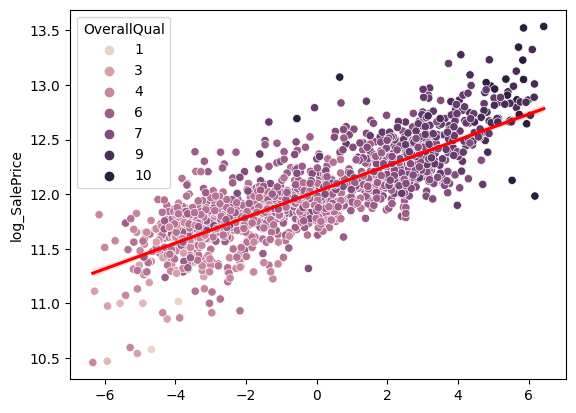

In [37]:
selector = SelectKBest(f_regression, k=37).fit(df.drop(['SalePrice', 'log_SalePrice'],axis=1), df['log_SalePrice'])
cols_selected = df.columns[:-2][selector.get_support()]

X = selector.transform(df.drop(['SalePrice', 'log_SalePrice'],axis=1))
X_1d = PCA(n_components=1).fit_transform(X).reshape((1460, ))

sns.scatterplot(x=X_1d, y=df['log_SalePrice'], hue=train_df['OverallQual'])
sns.regplot(x=X_1d, y=df['log_SalePrice'], scatter=False, color='r') # best-fit line (Linear Regression Model)
plt.show()

It's a big difference because selecting features it can have a significant impact on the model’s performance and it can decrease computational costs..

NOTE: We tune number of feature(k) to be selected for good performance using PCA graph intuition..

In [38]:
print("Selected Columns to ML models")
cols_selected

Selected Columns to ML models


Index(['LotFrontage', 'LotArea', 'LotShape', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'SaleCondition'],
      dtype='object')

Dataset after dimensions reduction 

In [39]:
removed_cols = set(df.columns[:-2]) - set(cols_selected)
df = df.drop(removed_cols, axis=1)
df.head()

LotFrontage   LotArea  LotShape  OverallQual  YearBuilt  YearRemodAdd  \
Id                                                                          
1      0.150685  0.033420       3.0          6.0   0.949275      0.883333   
2      0.202055  0.038795       3.0          5.0   0.753623      0.433333   
3      0.160959  0.046507       0.0          6.0   0.934783      0.866667   
4      0.133562  0.038561       0.0          6.0   0.311594      0.333333   
5      0.215753  0.060576       0.0          7.0   0.927536      0.833333   

    MasVnrType  MasVnrArea  ExterQual  Foundation  ...  GarageCars  \
Id                                                 ...               
1          1.0     0.12250        2.0         2.0  ...         2.0   
2          1.0     0.00000        3.0         1.0  ...         2.0   
3          1.0     0.10125        2.0         2.0  ...         2.0   
4          1.0     0.00000        3.0         0.0  ...         3.0   
5          1.0     0.21875        2.0         2.0  ...         3.0   

    GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
Id                                                                            
1     0.368280         5.0         5.0         2.0    0.000000     0.082210   
2     0.309140         5.0         5.0         2.0    0.209270     0.000000   
3     0.408602         5.0         5.0         2.0    0.000000     0.056604   
4     0.431452         5.0         5.0         2.0    0.000000     0.047170   
5     0.561828         5.0         5.0         2.0    0.134831     0.113208   

    SaleCondition  SalePrice  log_SalePrice  
Id                                           
1             4.0   208500.0      12.247694  
2             4.0   181500.0      12.109011  
3             4.0   223500.0      12.317167  
4             0.0   140000.0      11.849398  
5             4.0   250000.0      12.429216  

[5 rows x 39 columns]

Test-dataset after preparation

In [40]:
test_df.shape

(1459, 76)

In [41]:
test_df = test_df.drop(list(removed_cols)+['SalePrice'], axis=1)
test_df

LotFrontage   LotArea  LotShape  OverallQual  YearBuilt  YearRemodAdd  \
Id                                                                            
1461     0.202055  0.048246       3.0          4.0   0.644928      0.183333   
1462     0.205479  0.060609       0.0          5.0   0.623188      0.133333   
1463     0.181507  0.058566       0.0          4.0   0.905797      0.800000   
1464     0.195205  0.040562       0.0          5.0   0.913043      0.800000   
1465     0.075342  0.017318       0.0          7.0   0.869565      0.700000   
...           ...       ...       ...          ...        ...           ...   
2915     0.000000  0.002973       3.0          3.0   0.710145      0.333333   
2916     0.000000  0.002776       3.0          3.0   0.710145      0.333333   
2917     0.476027  0.087406       3.0          4.0   0.637681      0.766667   
2918     0.140411  0.042726       3.0          4.0   0.869565      0.700000   
2919     0.181507  0.038921       3.0          6.0   0.876812      0.733333   

      MasVnrType  MasVnrArea  ExterQual  Foundation  ...  GarageYrBlt  \
Id                                                   ...                
1461         1.0     0.00000        3.0         1.0  ...     0.888536   
1462         1.0     0.06750        3.0         1.0  ...     0.887177   
1463         1.0     0.00000        3.0         2.0  ...     0.904848   
1464         1.0     0.01250        3.0         2.0  ...     0.905301   
1465         1.0     0.00000        2.0         2.0  ...     0.902583   
...          ...         ...        ...         ...  ...          ...   
2915         1.0     0.00000        3.0         1.0  ...     0.000000   
2916         1.0     0.00000        3.0         1.0  ...     0.892614   
2917         1.0     0.00000        3.0         1.0  ...     0.888083   
2918         1.0     0.00000        3.0         2.0  ...     0.000000   
2919         1.0     0.05875        3.0         2.0  ...     0.903036   

      GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  \
Id                                                                   
1461           3.0         1.0    0.490591         5.0         5.0   
1462           3.0         1.0    0.209677         5.0         5.0   
1463           0.0         2.0    0.323925         5.0         5.0   
1464           0.0         2.0    0.315860         5.0         5.0   
1465           2.0         2.0    0.340054         5.0         5.0   
...            ...         ...         ...         ...         ...   
2915           1.0         0.0    0.000000         3.0         3.0   
2916           3.0         1.0    0.192204         5.0         5.0   
2917           3.0         2.0    0.387097         5.0         5.0   
2918           1.0         0.0    0.000000         3.0         3.0   
2919           0.0         3.0    0.436828         5.0         5.0   

      PavedDrive  WoodDeckSF  OpenPorchSF  SaleCondition  
Id                                                        
1461         2.0    0.098315     0.000000            4.0  
1462         2.0    0.275983     0.048518            4.0  
1463         2.0    0.148876     0.045822            4.0  
1464         2.0    0.252809     0.048518            4.0  
1465         2.0    0.000000     0.110512            4.0  
...          ...         ...          ...            ...  
2915         2.0    0.000000     0.000000            4.0  
2916         2.0    0.000000     0.032345            0.0  
2917         2.0    0.332865     0.000000            0.0  
2918         2.0    0.056180     0.043127            4.0  
2919         2.0    0.133427     0.064690            4.0  

[1459 rows x 37 columns]

Save train & test datasets after preparation

In [42]:
# df.to_csv('D:\\WORK Space\\My Portfolio\\House Prices\\0-Data\\processed data\\train_prep_data.csv')
# test_df.to_csv('D:\\WORK Space\\My Portfolio\\House Prices\\0-Data\\processed data\\test_prep_data.csv')